Day 2 problem statements

In [391]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [392]:
census_data = pd.read_csv("C:\College\Futurense Internship\Data\census_2011.csv")
# Define the columns to keep
columns_to_keep = [
    "State name",
    "District name",
    "Population",
    "Male",
    "Female",
    "Literate",
    "Male_Literate",
    "Female_Literate",
    "Rural_Households",
    "Urban_Households",
    "Households",
    "Age_Group_0_29",
    "Age_Group_30_49",
    "Age_Group_50",
    "Age not stated"
]

# Keep only the required columns
census_data = census_data[columns_to_keep]

# Calculate the percentage of missing data before filling
missing_before = (census_data.isnull().sum() / len(census_data)) * 100


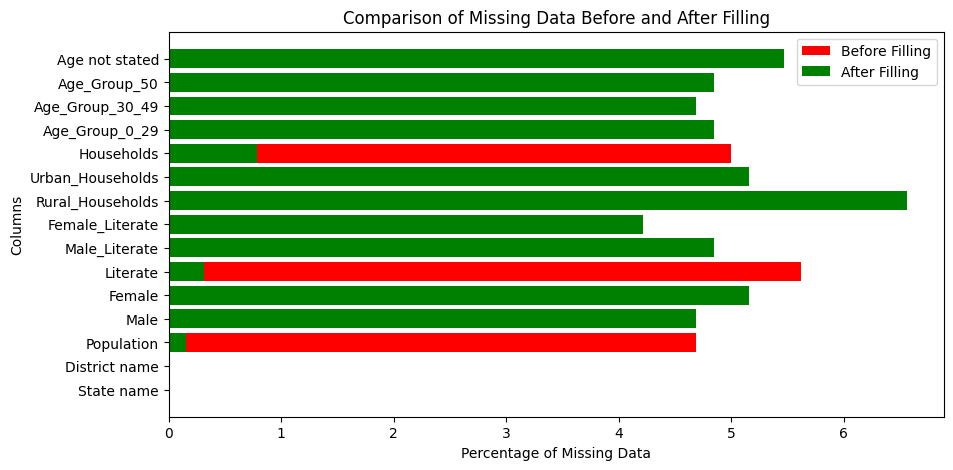

              Column  Missing Percentage
0         State name             0.00000
1      District name             0.00000
2         Population             0.15625
3               Male             4.68750
4             Female             5.15625
5           Literate             0.31250
6      Male_Literate             4.84375
7    Female_Literate             4.21875
8   Rural_Households             6.56250
9   Urban_Households             5.15625
10        Households             0.78125
11    Age_Group_0_29             4.84375
12   Age_Group_30_49             4.68750
13      Age_Group_50             4.84375
14    Age not stated             5.46875


In [393]:
# Fill missing data 
census_data['Population'].fillna(census_data['Male'] + census_data['Female'], inplace=True)
census_data['Literate'].fillna(census_data['Male_Literate'] + census_data['Female_Literate'], inplace=True)
census_data['Households'].fillna(census_data['Rural_Households'] + census_data['Urban_Households'], inplace=True)
census_data['Population'].fillna(census_data['Age_Group_0_29'] + census_data['Age_Group_30_49'] + census_data['Age_Group_50'] + census_data['Age not stated'], inplace=True)

# Recalculate the percentage of missing data after filling
missing_after = (census_data.isnull().sum() / len(census_data)) * 100

# visualization to compare the amount of missing data before and after filling
plt.figure(figsize=(10, 5))
plt.barh(missing_before.index, missing_before, color='red', label='Before Filling')
plt.barh(missing_after.index, missing_after, color='green', label='After Filling')
plt.xlabel('Percentage of Missing Data')
plt.ylabel('Columns')
plt.title('Comparison of Missing Data Before and After Filling')
plt.legend()
plt.show()

# Store the percentage of missing data for each column
missing_percentage = pd.DataFrame({'Column': missing_after.index, 'Missing Percentage': missing_after.values})
print(missing_percentage)

In [394]:
census_data.to_csv('C:\College\Futurense Internship\clean datasets\census.csv')

In [395]:
housing_data = pd.read_csv('C:\College\Futurense Internship\Data\housing.csv')

required_columns = [
    "District Name",
    "Rural/Urban",
    "Total Number of households",
    "Total Number of Livable",
    "Total Number of Dilapidated",
    "Latrine_premise"
]
housing_data = housing_data[required_columns]
housing_data = housing_data.rename(columns ={'District Name' : "District name"}) 
housing_data.head()

,District name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Kupwara,Rural,100,58.1,8.3,48.9
1,Kupwara,Total,100,57.3,7.9,50.9
2,Kupwara,Urban,100,49.5,4.8,70.2
3,Badgam,Rural,100,46.3,3.9,83.3
4,Badgam,Total,100,44.7,3.8,84.3


In [396]:
#Merge census and housing data
housing_census = pd.merge(census_data, housing_data, on='District name', how="inner")

#fill in missing Household values
housing_census['Urban_Households'].fillna(housing_census['Households'] - housing_census['Rural_Households'], inplace=True)
housing_census = housing_census.fillna(housing_census.mean())
                                       
#rename column
housing_census = housing_census.rename(columns={'District name': 'District'})

housing_census.head()

C:\Users\achin\AppData\Local\Temp\ipykernel_18832\1787974217.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_census = housing_census.fillna(housing_census.mean())


,State name,District,Population,Male,Female,Literate,Male_Literate,Female_Literate,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.000000,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Rural,100,58.1,8.3,48.9
1,JAMMU AND KASHMIR,Kupwara,870354.0,474190.000000,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Total,100,57.3,7.9,50.9
2,JAMMU AND KASHMIR,Kupwara,870354.0,474190.000000,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Urban,100,49.5,4.8,70.2
3,JAMMU AND KASHMIR,Badgam,753745.0,971351.216658,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0,Rural,100,46.3,3.9,83.3
4,JAMMU AND KASHMIR,Badgam,753745.0,971351.216658,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0,Total,100,44.7,3.8,84.3


In [397]:
#Calculate absolute values for given percentage values

housing_census['Absolute_Dilapidated'] = housing_census['Total Number of Dilapidated'] * housing_census['Households'] / 100
housing_census['Absolute_Latrine_premise'] = housing_census['Latrine_premise'] * housing_census['Households'] / 100
housing_census['Absolute_Livable'] = housing_census['Total Number of Livable'] * housing_census['Households'] / 100

housing_census['Households_Rural_Livable'] = (housing_census['Rural_Households'] * housing_census['Total Number of Livable']) / 100
housing_census['Households_Rural_Dilapidated'] = (housing_census['Rural_Households'] * housing_census['Total Number of Dilapidated']) / 100
housing_census['Households_Rural_Toilet_Premise'] = (housing_census['Rural_Households'] * housing_census['Absolute_Latrine_premise']) / 100
housing_census['Households_Urban_Livable'] = (housing_census['Urban_Households'] * housing_census['Total Number of Livable']) / 100
housing_census['Households_Urban_Dilapidated'] = (housing_census['Urban_Households'] * housing_census['Total Number of Dilapidated']) / 100
housing_census['Households_Urban_Toilet_Premise'] = (housing_census['Urban_Households'] * housing_census['Absolute_Latrine_premise']) / 100

housing_census.head()

,State name,District,Population,Male,Female,Literate,Male_Literate,Female_Literate,Rural_Households,Urban_Households,...,Latrine_premise,Absolute_Dilapidated,Absolute_Latrine_premise,Absolute_Livable,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.000000,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,...,48.9,15078.112,88833.696,105546.784,92052.478,13150.354,1.407463e+08,13494.306,1927.758,2.063251e+07
1,JAMMU AND KASHMIR,Kupwara,870354.0,474190.000000,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,...,50.9,14351.456,92466.976,104093.472,90784.974,12516.602,1.465028e+08,13308.498,1834.854,2.147638e+07
2,JAMMU AND KASHMIR,Kupwara,870354.0,474190.000000,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,...,70.2,8719.872,127528.128,89923.680,78426.810,7605.024,2.020530e+08,11496.870,1114.848,2.961968e+07
3,JAMMU AND KASHMIR,Badgam,753745.0,971351.216658,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,...,83.3,7325.721,156469.887,86969.457,74380.487,6265.311,2.513673e+08,12588.970,1060.410,4.254416e+07
4,JAMMU AND KASHMIR,Badgam,753745.0,971351.216658,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,...,84.3,7137.882,158348.277,83964.033,71810.103,6104.662,2.543849e+08,12153.930,1033.220,4.305490e+07


In [398]:
# Report any districts missing in one file but not the other
missing_in_housing = set(census_data['District name']) - set(housing_census['District'])
missing_in_census = set(housing_census['District']) - set(census_data['District name'])

print("Districts missing in housing data but present in census data:", missing_in_housing)
print("Districts missing in census data but present in housing data:", missing_in_census)

Districts missing in housing data but present in census data: {'Dadra AND Nagar Haveli', 'North  AND Middle Andaman', 'Lahul AND Spiti', 'PONDICHERRY', 'Lakshadweep'}
Districts missing in census data but present in housing data: set()


In [399]:
# Calculate percentage difference for "Households_Rural" and "Households_Urban"
housing_census['Households_Total'] = housing_census['Rural_Households'] + housing_census['Urban_Households']
census_data['Households_Total'] = census_data['Rural_Households'] + census_data['Urban_Households']

housing_census['Percent_Diff_Rural'] = ((housing_census['Rural_Households'] - census_data['Rural_Households']) / census_data['Rural_Households']) * 100
housing_census['Percent_Diff_Urban'] = ((housing_census['Urban_Households'] - census_data['Urban_Households']) / census_data['Urban_Households']) * 100

# Find districts with major differences (> 10%) in "Households_Rural" and "Households_Urban"
major_diff_rural = housing_census[housing_census['Percent_Diff_Rural'].abs() > 10]['District'].tolist()
major_diff_urban = housing_census[housing_census['Percent_Diff_Urban'].abs() > 10]['District'].tolist()

print("Districts with major differences (> 10%) in Households_Rural:", major_diff_rural)
print("Districts with major differences (> 10%) in Households_Urban:", major_diff_urban)

Districts with major differences (> 10%) in Households_Rural: ['Kupwara', 'Badgam', 'Badgam', 'Badgam', 'Leh(Ladakh)', 'Leh(Ladakh)', 'Leh(Ladakh)', 'Kargil', 'Kargil', 'Kargil', 'Punch', 'Punch', 'Punch', 'Rajouri', 'Rajouri', 'Rajouri', 'Kathua', 'Kathua', 'Kathua', 'Baramula', 'Baramula', 'Baramula', 'Bandipore', 'Bandipore', 'Bandipore', 'Srinagar', 'Srinagar', 'Srinagar', 'Ganderbal', 'Ganderbal', 'Ganderbal', 'Pulwama', 'Pulwama', 'Pulwama', 'Shupiyan', 'Shupiyan', 'Shupiyan', 'Anantnag', 'Anantnag', 'Kulgam', 'Kulgam', 'Doda', 'Doda', 'Doda', 'Ramban', 'Ramban', 'Ramban', 'Kishtwar', 'Kishtwar', 'Kishtwar', 'Udhampur', 'Udhampur', 'Reasi', 'Reasi', 'Reasi', 'Jammu', 'Jammu', 'Samba', 'Samba', 'Samba', 'Chamba', 'Chamba', 'Chamba', 'Kangra', 'Kangra', 'Kangra', 'Kullu', 'Kullu', 'Mandi', 'Mandi', 'Hamirpur', 'Hamirpur', 'Hamirpur', 'Hamirpur', 'Hamirpur', 'Hamirpur', 'Hamirpur', 'Hamirpur', 'Hamirpur', 'Una', 'Una', 'Una', 'Bilaspur', 'Bilaspur', 'Bilaspur', 'Bilaspur', 'Bilaspur

In [400]:
housing_census.to_csv('C:\College\Futurense Internship\clean datasets\new_housing.csv')

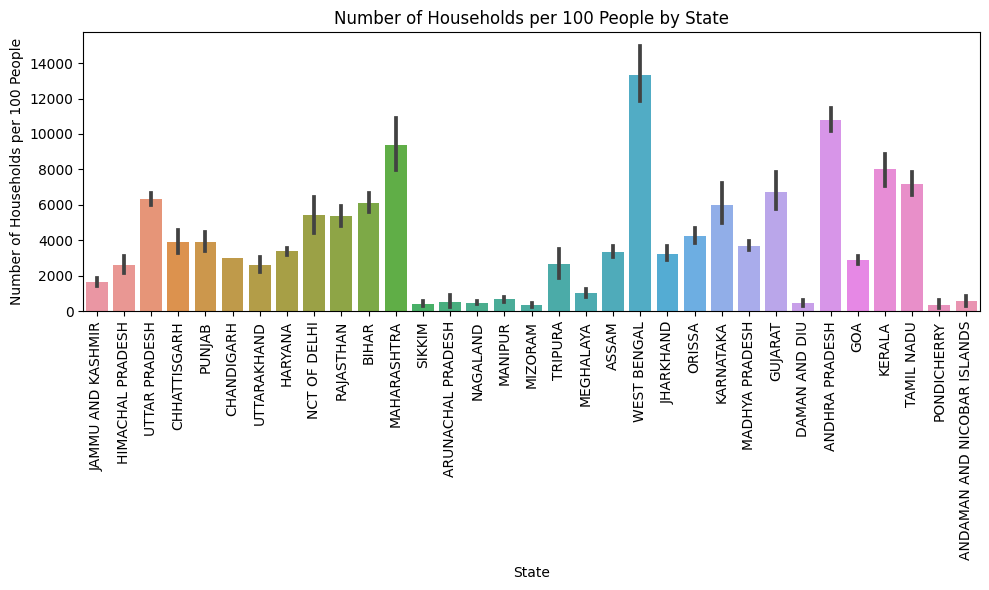

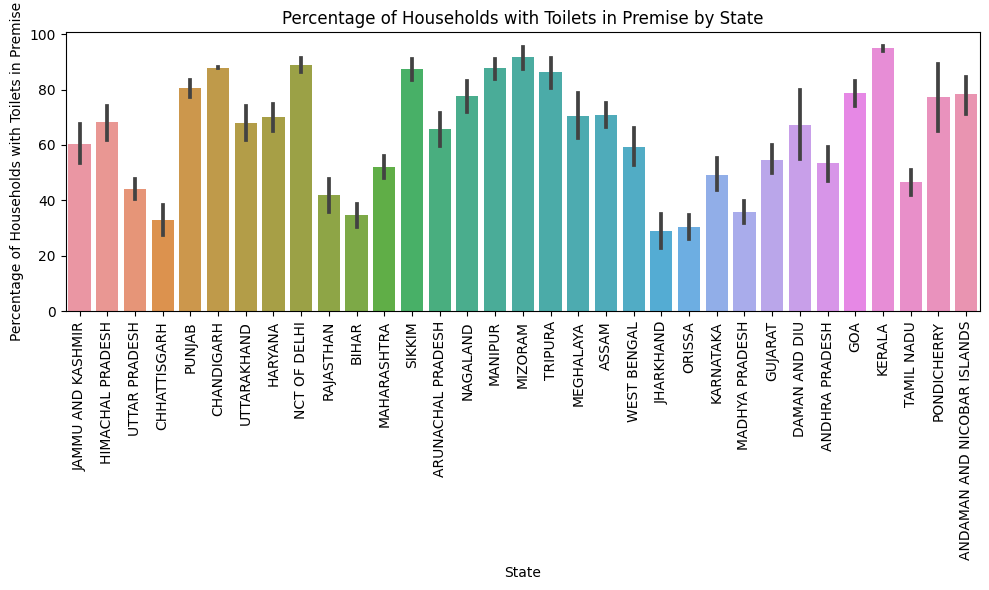

C:\Users\achin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\achin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


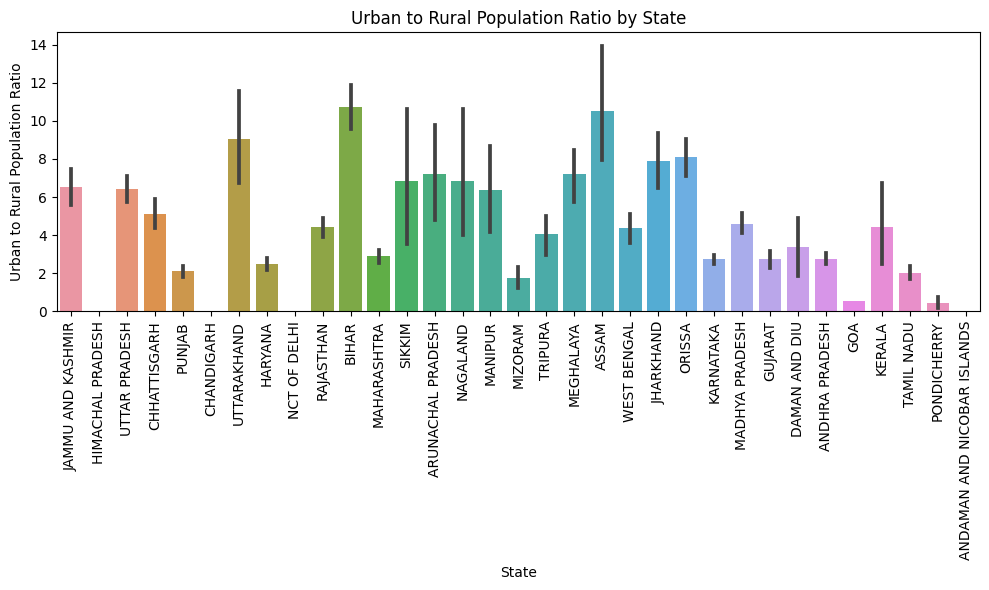

In [401]:
housing_census['Number of households per 100 people'] = housing_census['Households'] / 100
housing_census['Urban to Rural Population Ratio'] = housing_census['Rural_Households'] / housing_census['Urban_Households']
housing_census['Toilets in Premise Percentage'] = (housing_census['Absolute_Latrine_premise'] / housing_census['Households']) * 100

# Plotting Number of households for 100 people
plt.figure(figsize=(10, 6))
sns.barplot(x='State name', y='Number of households per 100 people', data=housing_census)
plt.title('Number of Households per 100 People by State')
plt.xlabel('State')
plt.ylabel('Number of Households per 100 People')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='State name', y='Toilets in Premise Percentage', data=housing_census)
plt.title('Percentage of Households with Toilets in Premise by State')
plt.xlabel('State')
plt.ylabel('Percentage of Households with Toilets in Premise')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Plotting Urban to rural population ratio
plt.figure(figsize=(10, 6))
sns.barplot(x='State name', y='Urban to Rural Population Ratio', data=housing_census)
plt.title('Urban to Rural Population Ratio by State')
plt.xlabel('State')
plt.ylabel('Urban to Rural Population Ratio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
